In [1]:
#import and load all libraries we want
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron , LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset using pandas library
titanic_df = pd.read_csv('train.csv')

#read the first 5 rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#first look about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#show number of rows and columns
titanic_df.shape

(891, 12)

In [5]:
#number of values in each columns
for col in titanic_df.columns :
    print(f'==== col : {col} ====')
    print(titanic_df[col].value_counts())
    print('====================================')


==== col : PassengerId ====
PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64
==== col : Survived ====
Survived
0    549
1    342
Name: count, dtype: int64
==== col : Pclass ====
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
==== col : Name ====
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: co

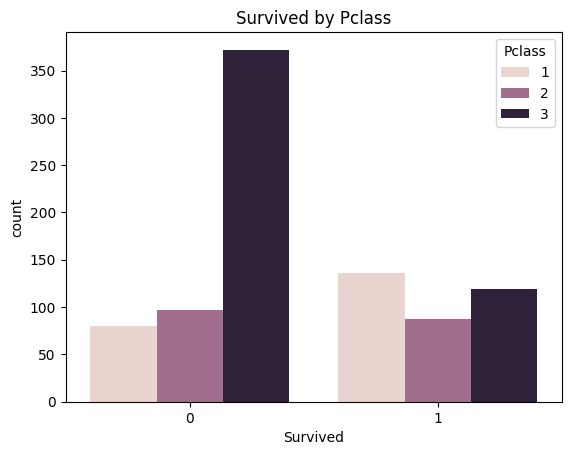

In [6]:
#Distribution of column (Survived by hue='Pclass') using countplot from seaborn library
sns.countplot(x='Survived' , hue='Pclass' , data = titanic_df)
plt.title('Survived by Pclass')
plt.show()

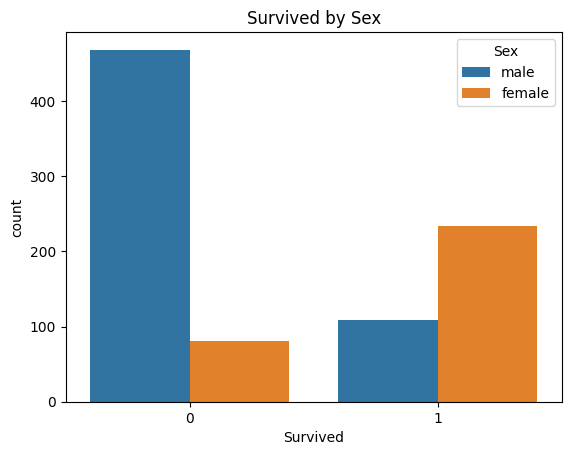

In [7]:
#Distribution of column (Survived by hue='Sex') using countplot from seaborn library
sns.countplot(x='Survived' , hue='Sex' , data = titanic_df)
plt.title('Survived by Sex')
plt.show()

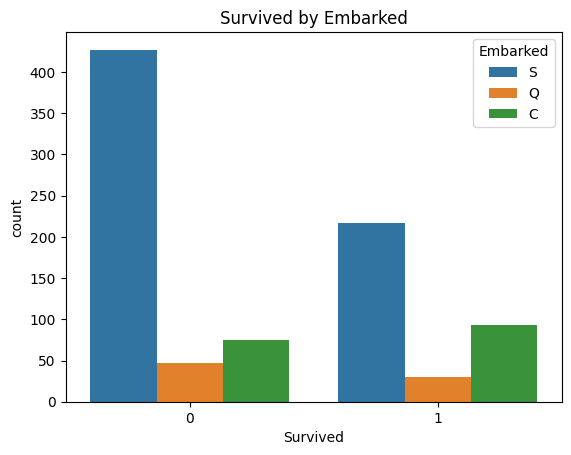

In [8]:
#Distribution of column (Survived by hue='Embarked') using countplot from seaborn library
sns.countplot(x='Survived' , hue='Embarked' , data = titanic_df)
plt.title('Survived by Embarked')
plt.show()

In [9]:
# Show numeric features most correlated with Survived
titanic_df.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


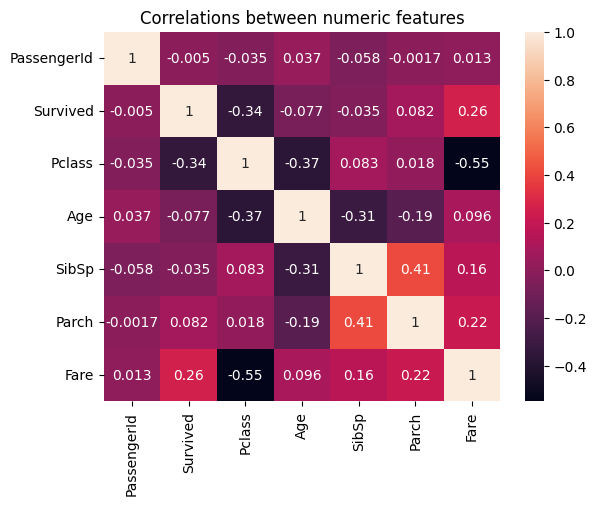

In [10]:
# Visualize correlations between numeric features using a heatmap
sns.heatmap(titanic_df.corr(numeric_only=True) , annot=True )
plt.title('Correlations between numeric features')
plt.show()

In [11]:
#all columns of Dataset
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
#drop unnecessary colmns
titanic_df.drop(columns=['PassengerId' ,'Name','Ticket' ,'Cabin'] , inplace=True)

In [13]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
#check about missing values
titanic_df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [15]:
#impute missing values , numerical with(median) & categorical with(mode)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [16]:
#check that all missing values were imputed
titanic_df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [17]:
#check about duplicated rows in the dataset
titanic_df.duplicated().sum()

np.int64(116)

In [18]:
#drop duplicated rows in the dataset
titanic_df.drop_duplicates(inplace=True)

In [19]:
titanic_df.duplicated().sum()

np.int64(0)

In [20]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
# convert all categorical columns into numerical columns using LabelEncoder
encoder = LabelEncoder()

titanic_df['Sex'] = encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = encoder.fit_transform(titanic_df['Embarked'])

In [22]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [23]:
# Get summary statistics for numerical columns (mean, std, min, max, quartiles)
titanic_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,0.623226,29.581187,0.529032,0.420645,34.878403,1.525161
std,0.492674,0.853574,0.484890,13.766359,0.990326,0.840565,52.408474,0.806353
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,15.900000,2.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,1.000000,34.197900,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [24]:
#scale the range of large columns
scaler = MinMaxScaler()

titanic_df[['Age' ,'Fare']] = scaler.fit_transform(titanic_df[['Age' ,'Fare']])

In [25]:
titanic_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,0.623226,0.366439,0.529032,0.420645,0.068078,1.525161
std,0.492674,0.853574,0.484890,0.172988,0.990326,0.840565,0.102295,0.806353
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.258608,0.000000,0.000000,0.015713,1.000000
50%,0.000000,3.000000,1.000000,0.346569,0.000000,0.000000,0.031035,2.000000
75%,1.000000,3.000000,1.000000,0.447097,1.000000,1.000000,0.066750,2.000000
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,2.000000


In [26]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2


In [27]:
#spilt data into features and label
features = titanic_df.drop('Survived' , axis=1)
label = titanic_df['Survived']

In [28]:
#spilt features and label into train , test
feature_train , feature_test , label_train , label_test = train_test_split(features , label , test_size=0.2 , random_state= 42)

In [29]:
print(feature_train.shape)
print(label_train.shape)

(620, 7)
(620,)


In [30]:
print(feature_test.shape)
print(label_test.shape)

(155, 7)
(155,)


In [31]:
#all models we use in dictionary
models = {
    'Perceptron Model' : Perceptron() ,
    'Logistic Regression Model ' : LogisticRegression() ,
    'SVC Model' : SVC() ,
    'Decision Tree Model ' : DecisionTreeClassifier() ,
    'Random Forest Model' : RandomForestClassifier() ,
    'K Neighbors Model' : KNeighborsClassifier() ,
    'CatBoost Model' : CatBoostClassifier() ,
    'AdaBoost Model' : AdaBoostClassifier(),
    'XGB Model '  : XGBClassifier() ,
    'LightGBM Model' : lgb.LGBMClassifier()
}

In [32]:
#visualize metrics of models
def visualize_model(actual,predicted) :
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(actual , predicted), annot=True, fmt="d")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [33]:
#try to train all models
def impute_model(model):
    model.fit(feature_train , label_train)
    train_pred = model.predict(feature_train)
    test_pred = model.predict(feature_test)

    print('Train classification report : \n' , classification_report(label_train , train_pred))

    visualize_model(label_train , train_pred)

    print('Test classification report : \n' , classification_report(label_test , test_pred))

    visualize_model(label_test , test_pred)

    print('==============================================')


=============== Perceptron() ===============
Train classification report : 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       360
           1       0.70      0.70      0.70       260

    accuracy                           0.75       620
   macro avg       0.74      0.74      0.74       620
weighted avg       0.75      0.75      0.75       620



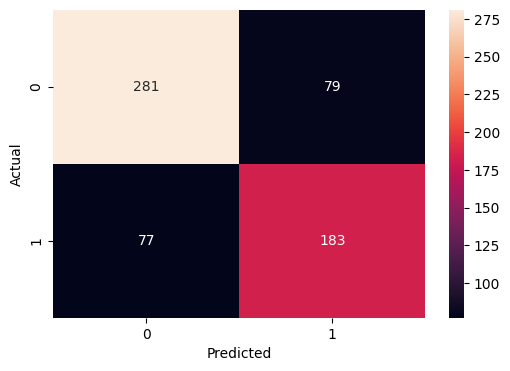

Test classification report : 
               precision    recall  f1-score   support

           0       0.85      0.78      0.81        95
           1       0.69      0.78      0.73        60

    accuracy                           0.78       155
   macro avg       0.77      0.78      0.77       155
weighted avg       0.79      0.78      0.78       155



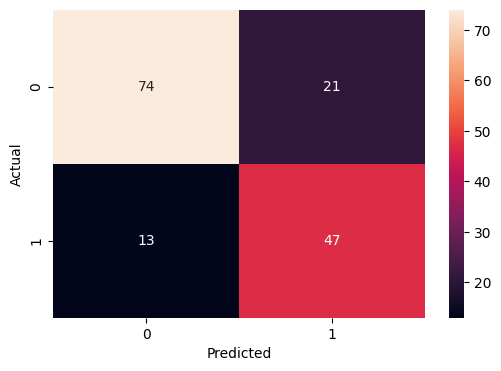

=============== LogisticRegression() ===============
Train classification report : 
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       360
           1       0.75      0.70      0.73       260

    accuracy                           0.78       620
   macro avg       0.77      0.77      0.77       620
weighted avg       0.78      0.78      0.78       620



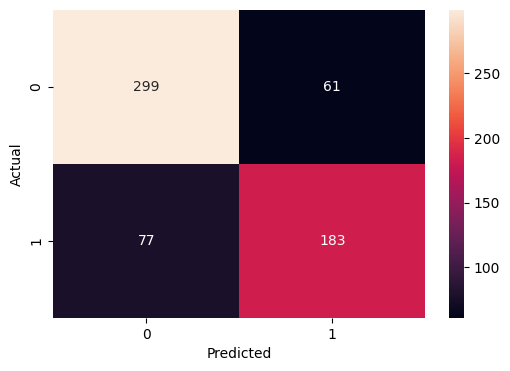

Test classification report : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        95
           1       0.70      0.73      0.72        60

    accuracy                           0.77       155
   macro avg       0.76      0.77      0.76       155
weighted avg       0.78      0.77      0.78       155



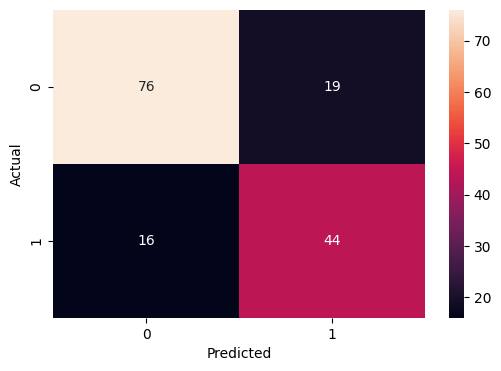

=============== SVC() ===============
Train classification report : 
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       360
           1       0.81      0.64      0.71       260

    accuracy                           0.78       620
   macro avg       0.79      0.76      0.77       620
weighted avg       0.79      0.78      0.78       620



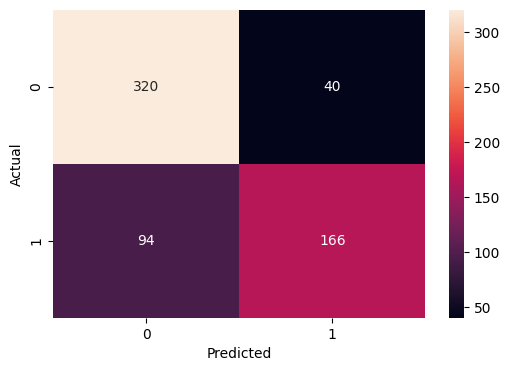

Test classification report : 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        95
           1       0.84      0.68      0.75        60

    accuracy                           0.83       155
   macro avg       0.83      0.80      0.81       155
weighted avg       0.83      0.83      0.82       155



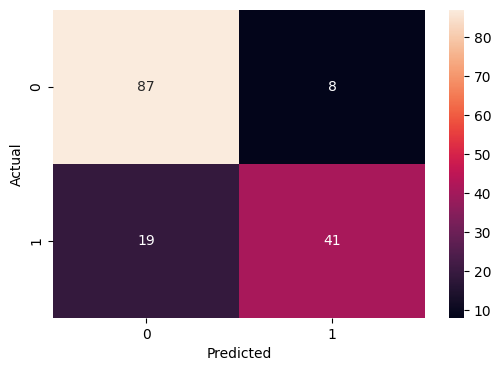

=============== DecisionTreeClassifier() ===============
Train classification report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       360
           1       1.00      0.95      0.98       260

    accuracy                           0.98       620
   macro avg       0.98      0.98      0.98       620
weighted avg       0.98      0.98      0.98       620



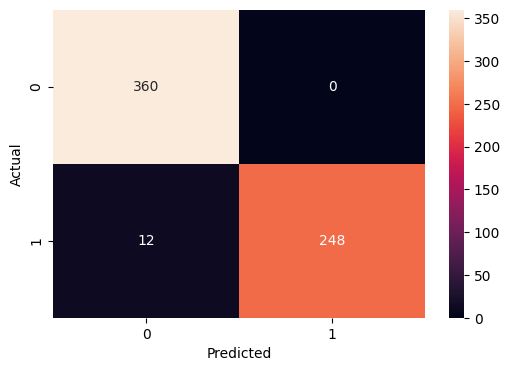

Test classification report : 
               precision    recall  f1-score   support

           0       0.78      0.73      0.75        95
           1       0.61      0.68      0.65        60

    accuracy                           0.71       155
   macro avg       0.70      0.70      0.70       155
weighted avg       0.72      0.71      0.71       155



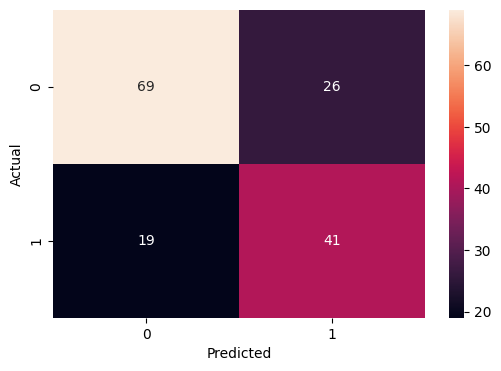

=============== RandomForestClassifier() ===============
Train classification report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       360
           1       0.98      0.97      0.98       260

    accuracy                           0.98       620
   macro avg       0.98      0.98      0.98       620
weighted avg       0.98      0.98      0.98       620



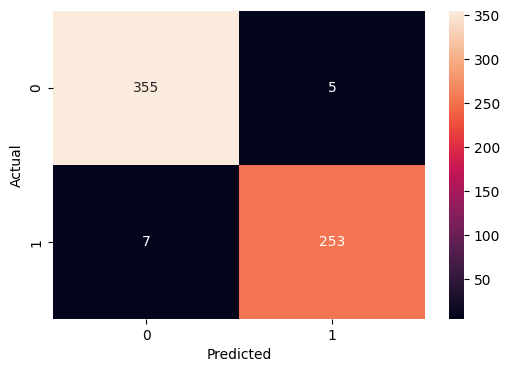

Test classification report : 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        95
           1       0.69      0.67      0.68        60

    accuracy                           0.75       155
   macro avg       0.74      0.74      0.74       155
weighted avg       0.75      0.75      0.75       155



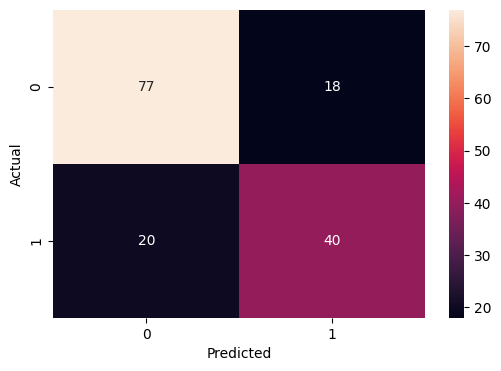

=============== KNeighborsClassifier() ===============
Train classification report : 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       360
           1       0.82      0.77      0.79       260

    accuracy                           0.83       620
   macro avg       0.83      0.82      0.82       620
weighted avg       0.83      0.83      0.83       620



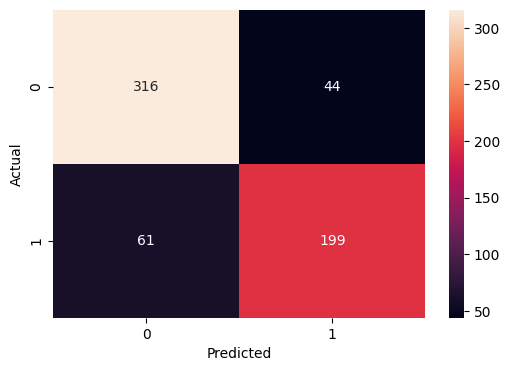

Test classification report : 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        95
           1       0.73      0.67      0.70        60

    accuracy                           0.77       155
   macro avg       0.76      0.75      0.76       155
weighted avg       0.77      0.77      0.77       155



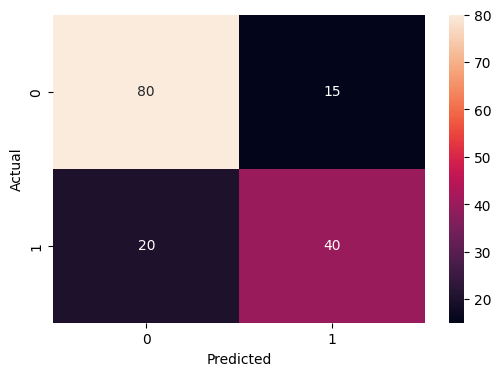

=============== <catboost.core.CatBoostClassifier object at 0x78372c945640> ===============
Learning rate set to 0.0084
0:	learn: 0.6879546	total: 51.5ms	remaining: 51.4s
1:	learn: 0.6826154	total: 53.3ms	remaining: 26.6s
2:	learn: 0.6781856	total: 54.5ms	remaining: 18.1s
3:	learn: 0.6732251	total: 55.7ms	remaining: 13.9s
4:	learn: 0.6691645	total: 56.6ms	remaining: 11.3s
5:	learn: 0.6640516	total: 63.5ms	remaining: 10.5s
6:	learn: 0.6602581	total: 64.5ms	remaining: 9.15s
7:	learn: 0.6555159	total: 65.7ms	remaining: 8.15s
8:	learn: 0.6509267	total: 66.9ms	remaining: 7.37s
9:	learn: 0.6467456	total: 76.6ms	remaining: 7.58s
10:	learn: 0.6423144	total: 77.8ms	remaining: 7s
11:	learn: 0.6378510	total: 79ms	remaining: 6.51s
12:	learn: 0.6338079	total: 80.2ms	remaining: 6.09s
13:	learn: 0.6302875	total: 115ms	remaining: 8.08s
14:	learn: 0.6276269	total: 116ms	remaining: 7.59s
15:	learn: 0.6239171	total: 120ms	remaining: 7.37s
16:	learn: 0.6207516	total: 121ms	remaining: 6.98s
17:	learn: 0.61

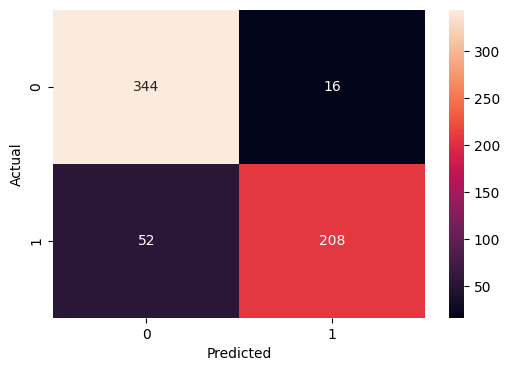

Test classification report : 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        95
           1       0.76      0.65      0.70        60

    accuracy                           0.79       155
   macro avg       0.78      0.76      0.77       155
weighted avg       0.79      0.79      0.78       155



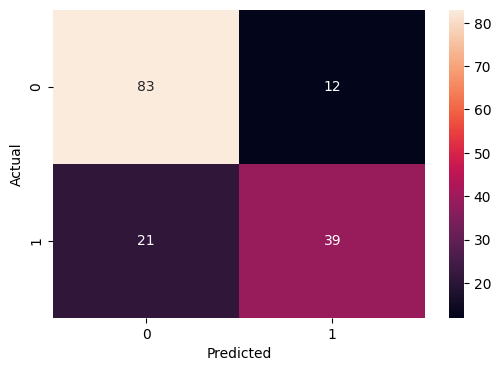

=============== AdaBoostClassifier() ===============
Train classification report : 
               precision    recall  f1-score   support

           0       0.80      0.89      0.85       360
           1       0.83      0.70      0.76       260

    accuracy                           0.81       620
   macro avg       0.81      0.80      0.80       620
weighted avg       0.81      0.81      0.81       620



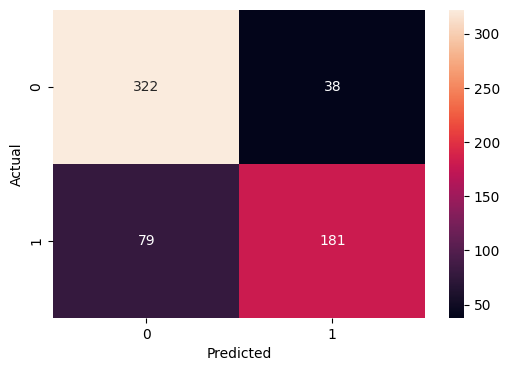

Test classification report : 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85        95
           1       0.78      0.70      0.74        60

    accuracy                           0.81       155
   macro avg       0.80      0.79      0.79       155
weighted avg       0.80      0.81      0.80       155



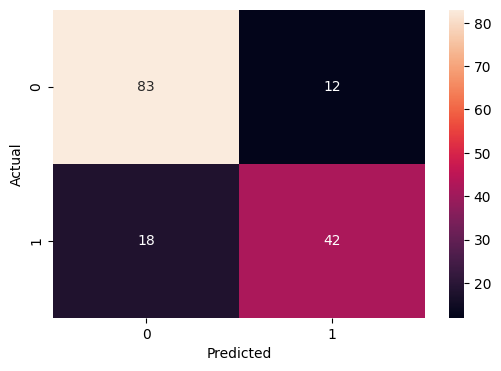

=============== XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) ===============
Train classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       360
           1       0.99      0.93      0.96       260

    accurac

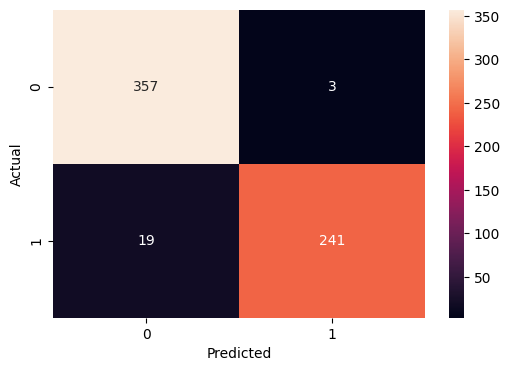

Test classification report : 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81        95
           1       0.72      0.63      0.67        60

    accuracy                           0.76       155
   macro avg       0.75      0.74      0.74       155
weighted avg       0.76      0.76      0.76       155



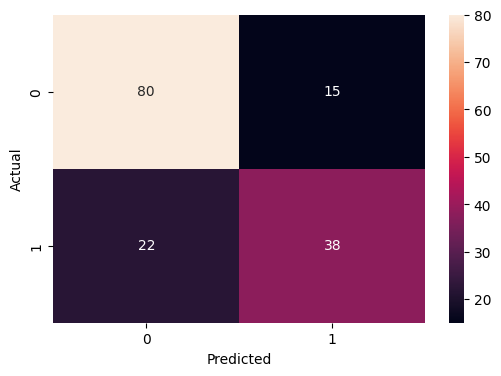

=============== LGBMClassifier() ===============
[LightGBM] [Info] Number of positive: 260, number of negative: 360
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 620, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.419355 -> initscore=-0.325422
[LightGBM] [Info] Start training from score -0.325422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

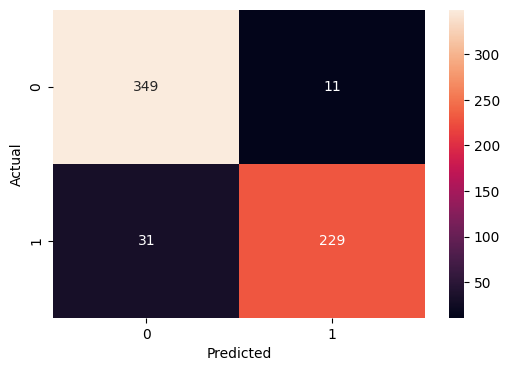

Test classification report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.81        95
           1       0.70      0.63      0.67        60

    accuracy                           0.75       155
   macro avg       0.74      0.73      0.74       155
weighted avg       0.75      0.75      0.75       155



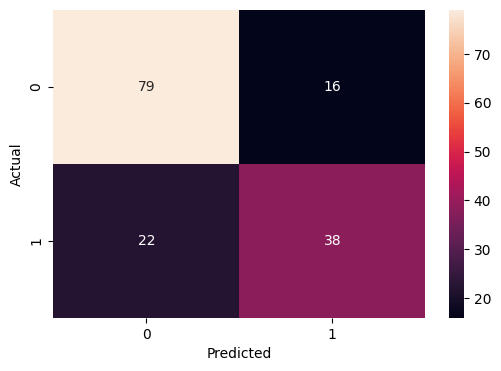

In [34]:
#for loop to train all models and choose the best model
for model in models.values() :
    print(f'=============== {model} ===============')
    impute_model(model)

In [35]:
#choose the best model
model = SVC()
model.fit(feature_train , label_train)

SVC()

In [36]:
model_predict = model.predict(feature_test)
model_predict

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0])

In [37]:
feature_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
477,3,1,0.359135,1,0,0.013752,2
813,3,0,0.070118,4,2,0.061045,2
353,3,1,0.308872,1,0,0.034743,2
879,1,0,0.698417,0,1,0.162314,0
396,3,0,0.384267,0,0,0.015330,2


In [38]:
label_test.head()

,Survived
477,0
813,0
353,0
879,1
396,0


In [39]:
print(model.predict([[3,1,0.359135,1,0,0.013752,2]]))

[0]


In [40]:
#ensure that model (svc) using accuracy score
print('accuracy_score : ',accuracy_score(label_test , model_predict))

accuracy_score :  0.8258064516129032
